In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats


# To print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display data to three deciaml places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To print all columns
pd.set_option('max_columns', None)

## 1. 데이터 수집 및 분석
 * 데이터 출처 : [KBO프로야구 공식사이트](https://www.koreabaseball.com/Record/Player/HitterBasic/BasicOld.aspx?sort=HRA_RT), [kbreport](http://www.kbreport.com/leader/main)

In [21]:
# 2021년 KBO 타자 데이터 수집
kbo2021_df = pd.read_csv("../data/kbo2021.csv", encoding="CP949")

# 2020년 KBO 타자 데이터 수집
kbo2020_df = pd.read_csv("../data/kbo2020.csv", encoding="CP949")

# 데이터 일부 출력
kbo2021_df.head(3)
kbo2020_df.head(3)

,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.100
1,2,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.060
2,3,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.970


,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,로하스,KT,142,628,550,192,47,116,135,65,132,0,0.383,0.349,0.417,0.680,1.097,0.457,8.760
1,2,양의지,NC,130,528,461,151,33,86,124,46,47,5,0.305,0.328,0.400,0.603,1.003,0.423,6.920
2,3,김하성,Hero,138,622,533,163,30,111,109,75,68,23,0.304,0.306,0.397,0.523,0.920,0.401,6.810


In [22]:
# WAR 2020과 WAR 2021을 비교하기 위해, kbo2020_df에 WAR 2021 column을 추가
kbo2021_df = kbo2021_df[['선수명', 'WAR']]
baseball_df = pd.merge(kbo2020_df, kbo2021_df, on='선수명', how='left')

# column명 변경
baseball_df.rename(columns = {'WAR_x' : 'WAR(2020)', 'WAR_y' : 'WAR(2021)'}, inplace=True)

In [23]:
# 쓸모없는 column 제거
baseball_df = baseball_df.drop(['#'], axis=1)
baseball_df = baseball_df.drop(['BABIP'], axis=1)

baseball_df_columns = [['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

# left join 과정에서 WAR(2021)에 NaN값 가진 선수 제거
baseball_df = baseball_df.dropna()
baseball_df.info()


# BABIP object형 int로 전환
# baseball_DF["BABIP"] = pd.to_numeric(baseball_DF["BABIP"])
# baseball_DF["BABIP"].astype('float32
# 그냥 우선 BABIP 컬럼 제거하자. 전환하는 방법은 나중에 생각해보기
# baseball_df = baseball_df.drop(['BABIP'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1 to 310
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   선수명        246 non-null    object 
 1   팀명         246 non-null    object 
 2   경기         246 non-null    int64  
 3   타석         246 non-null    int64  
 4   타수         246 non-null    int64  
 5   안타         246 non-null    int64  
 6   홈런         246 non-null    int64  
 7   득점         246 non-null    int64  
 8   타점         246 non-null    int64  
 9   볼넷         246 non-null    int64  
 10  삼진         246 non-null    int64  
 11  도루         246 non-null    int64  
 12  타율         246 non-null    float64
 13  출루율        246 non-null    float64
 14  장타율        246 non-null    float64
 15  OPS        246 non-null    float64
 16  Woba       246 non-null    float64
 17  WAR(2020)  246 non-null    float64
 18  WAR(2021)  246 non-null    float64
dtypes: float64(7), int64(10), object(2)
memory usage: 

In [24]:
# 한번에 15개를 보려니 화면이 깨져서, 아래에서 8개/7개로 나눔
# fig, axs = plt.subplots(figsize = (16, 30), ncols = 2, nrows = 8)
# lm_features = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷','삼진', '도루', 
#                '타율', '출루율', '장타율', 'OPS', 'Woba'] # 15개
# colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ,
#          'g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ,
#          'g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ]
# for i , feature in enumerate(lm_features):
#     row = int(i / 2)
#     col = i % 2
#     # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
#     sns.regplot(x=feature , y='WAR',data=baseball_df , ax=axs[row][col], color=colors[i])

# sns.regplot(x = '볼넷', y = 'WAR', data=baseball_df)

### WAR(2021) 분포 확인

<AxesSubplot:>

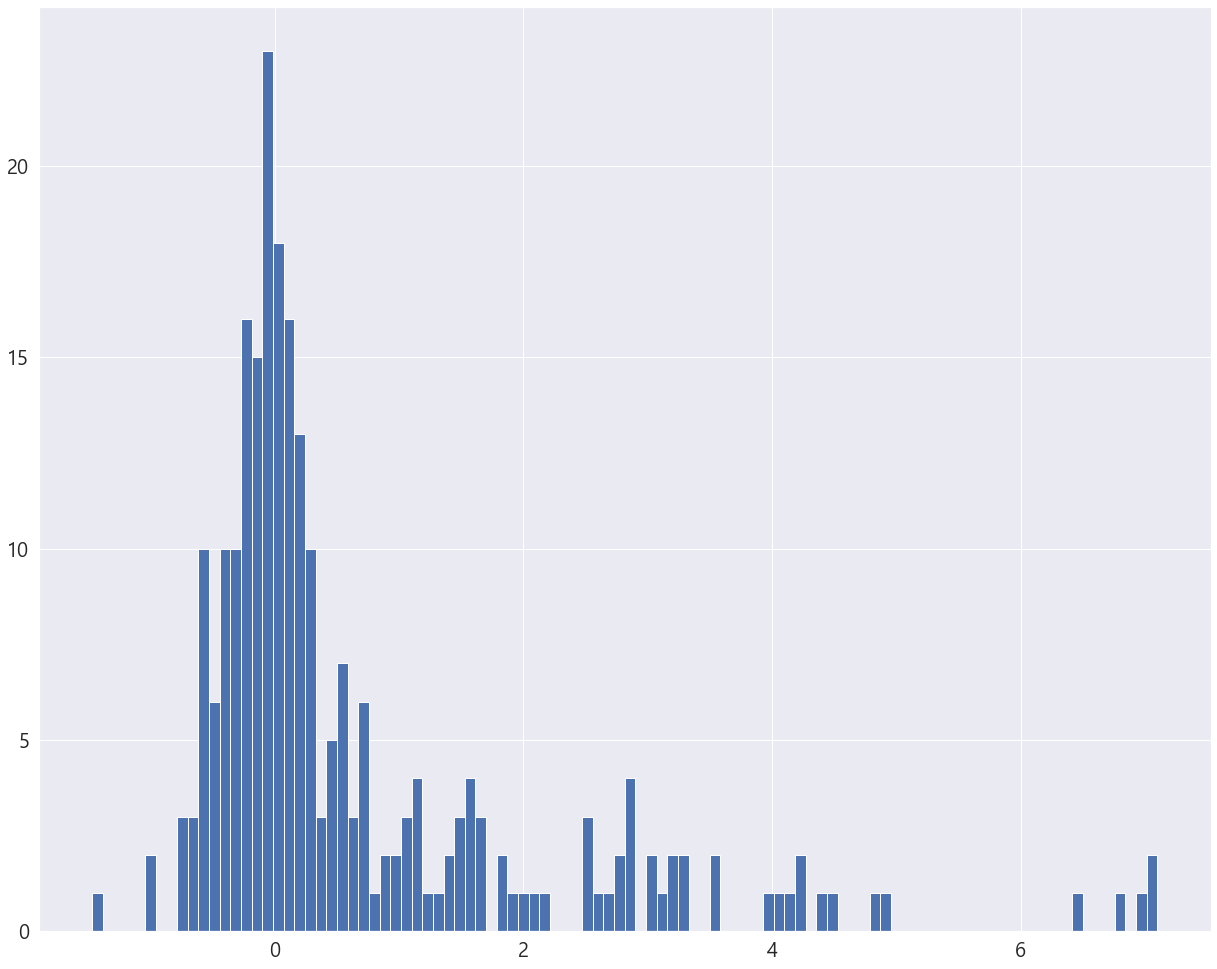

In [25]:
# WAR(2021) 분포 확인
# 0 근처의 WAR 값을 가진 분포가 대다수이다. 

baseball_df['WAR(2021)'].hist(bins=100, xlabelsize = 20, ylabelsize = 20)

### 회귀 분석에 사용할 컬럼 확인

In [26]:
baseball_df_columns = baseball_df[[ '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

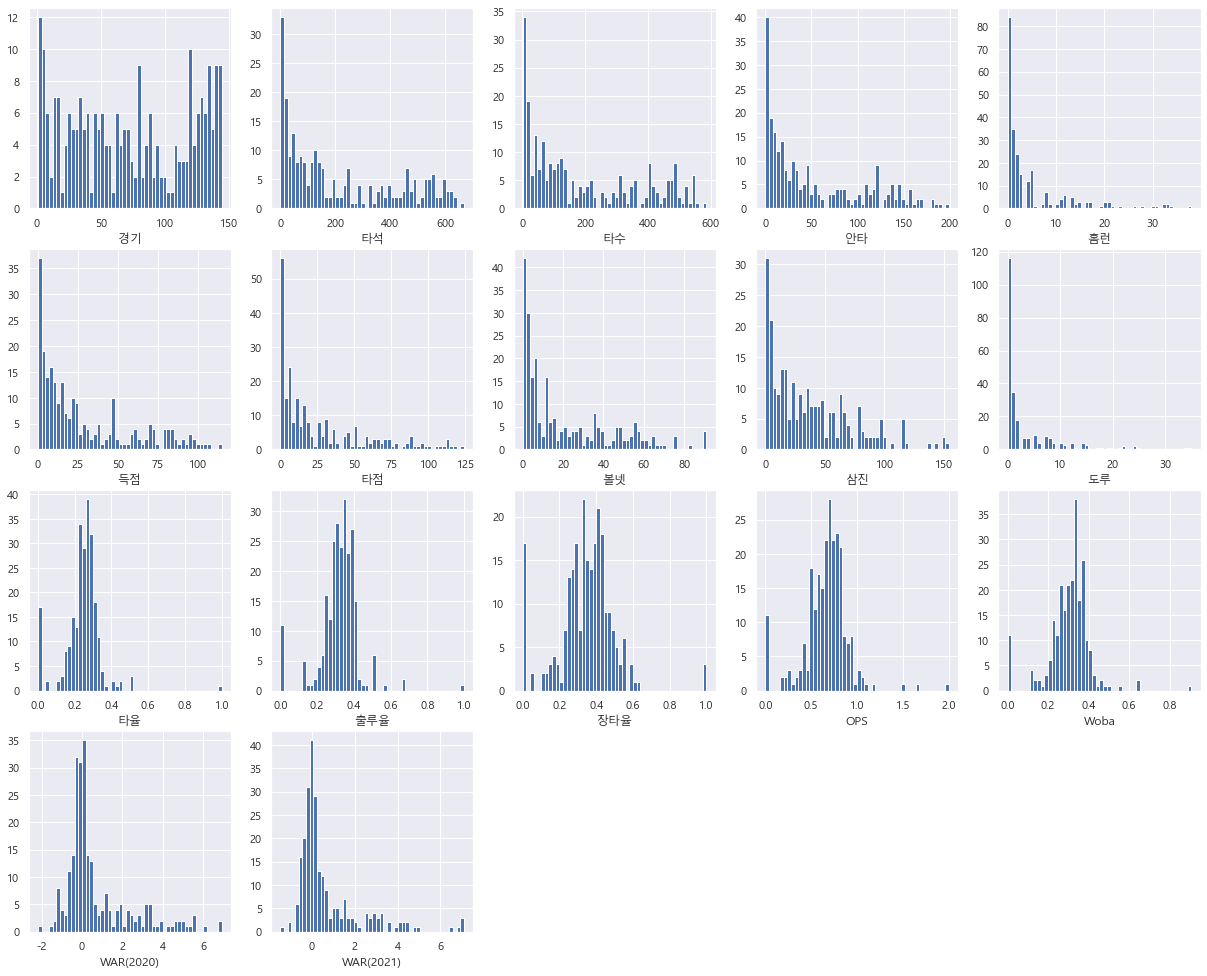

In [27]:
def plot_hist_column(df):
    plt.rcParams['figure.figsize'] = [21, 17]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i], y = -0.2) # title 위치를 하단으로 설정하기 위해 y값 추가
    plt.show()
    
plot_hist_column(baseball_df_columns)  

## 각 컬럼별로 WAR 수치에 미치는 영향도 조사

<AxesSubplot:xlabel='경기', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타석', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타수', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='안타', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='홈런', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='득점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='볼넷', ylabel='WAR(2021)'>

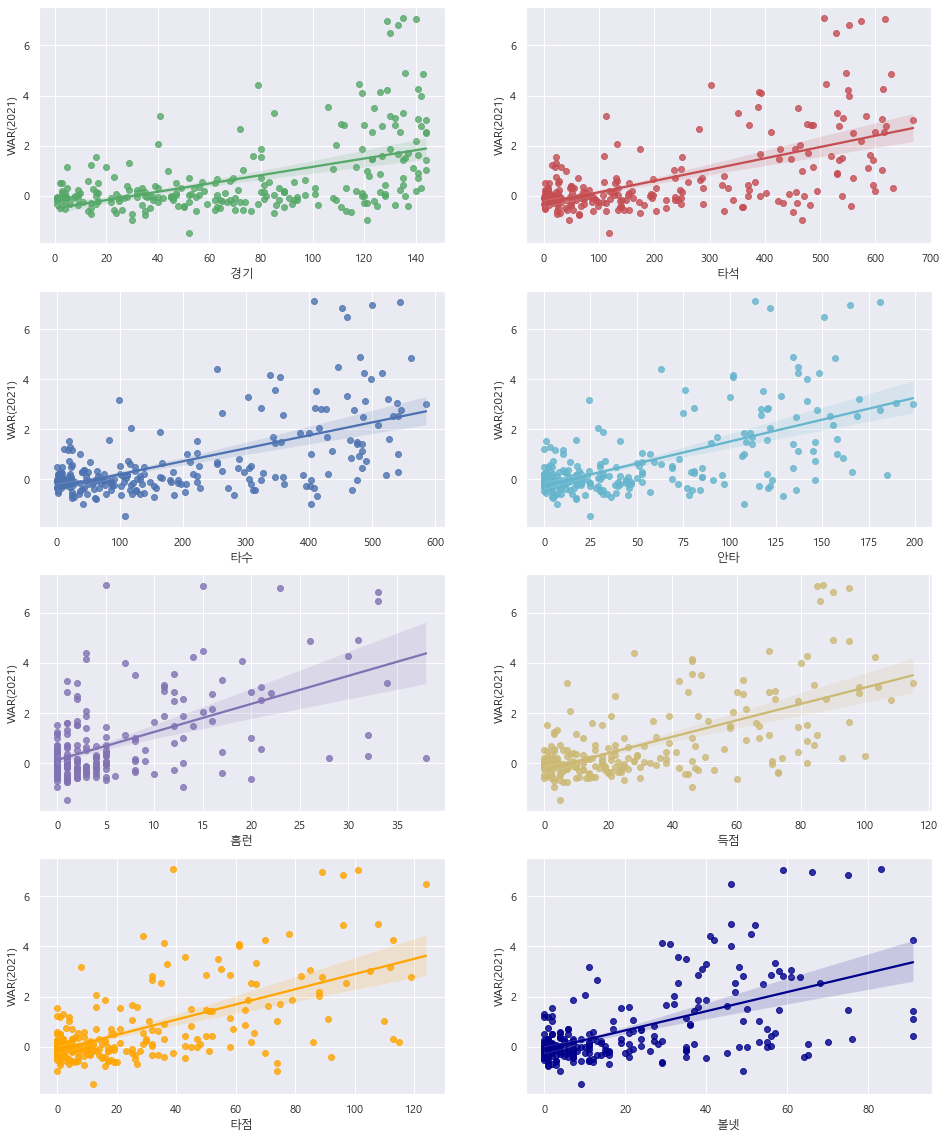

In [28]:
# seaborn에서 한글 깨짐 수정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷'] # 8개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

<AxesSubplot:xlabel='삼진', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='도루', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='출루율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='장타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='OPS', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='Woba', ylabel='WAR(2021)'>

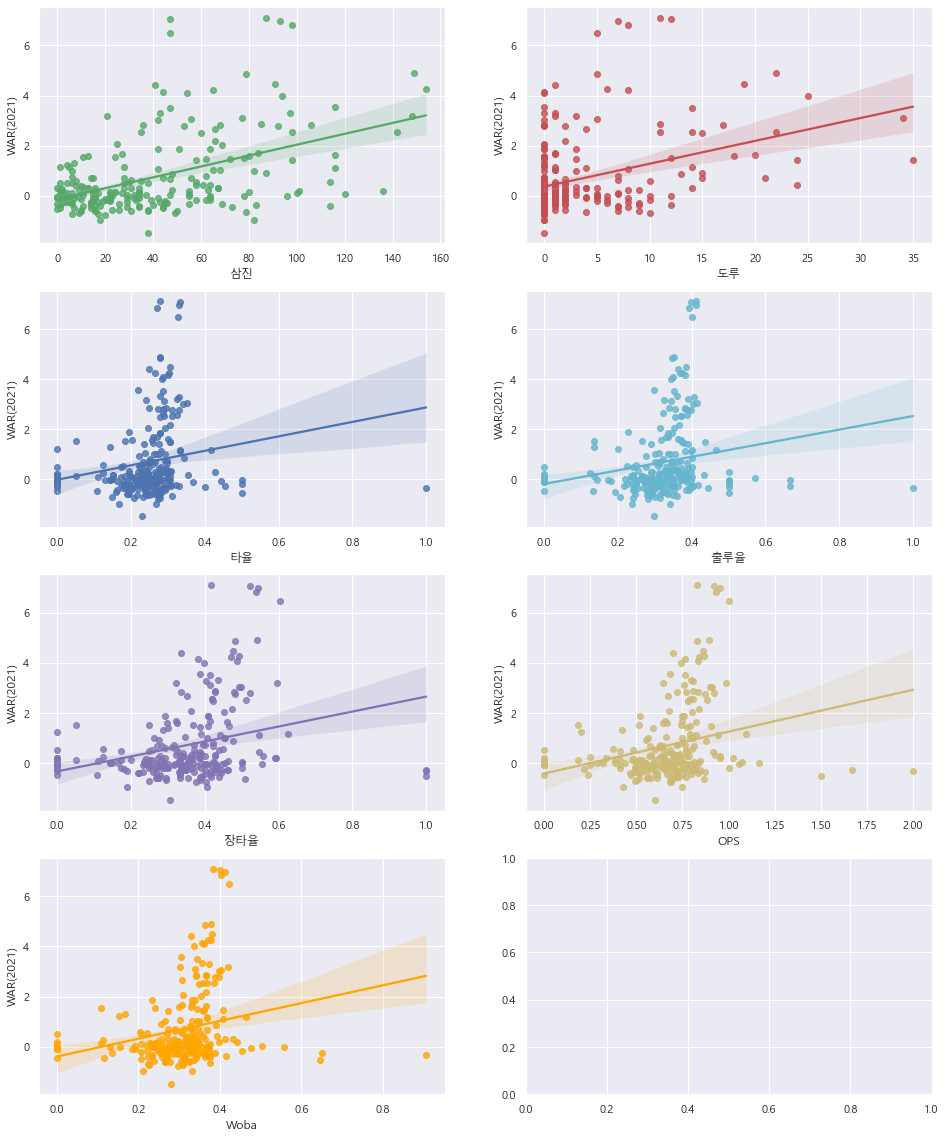

In [29]:
fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['삼진', '도루', '타율', '출루율', '장타율', 'OPS', 'Woba'] # 7개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

## 2. Feature Scaling 
* 서로 다른 변수(컬럼)의 값 범위를 일정한 수준으로 맞춰 준다. 

In [30]:
# 1. 표준화(Standardization)
def standardization(df, columns):
    for col in columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [31]:
scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷','삼진', '도루', 
                 '타율', '출루율', '장타율', 'OPS', 'Woba', 'WAR(2020)']
baseball_standardization_df = standardization(baseball_df, scale_columns)
baseball_standardization_df = baseball_standardization_df.rename(columns = {'WAR(2021)' : 'y'})

# 표준화결과 출력
baseball_standardization_df.head(3)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,타율,출루율,장타율,OPS,Woba,WAR(2020),y
1,양의지,NC,1.258,1.511,1.513,1.827,3.627,1.928,3.125,1.105,0.274,0.256,0.841,0.738,1.702,1.380,1.134,3.701,6.480
3,최형우,KIA,1.473,1.864,1.857,2.459,2.979,2.164,2.835,2.162,1.854,-0.580,1.093,1.038,1.618,1.460,1.304,3.593,0.190
4,터커,KIA,1.516,2.016,1.969,2.106,3.497,2.400,2.771,2.426,0.860,-0.580,0.627,0.720,1.404,1.187,1.030,3.211,0.300


## 회귀 분석 적용(Linear Regression)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, r2_score)
import math

In [33]:
# x : '선수명', '팀명', 'y'만 제외
x = baseball_standardization_df[baseball_standardization_df.columns.difference(['선수명', '팀명', 'y'])]
y = baseball_standardization_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

model = LinearRegression()
model = model.fit(x_train, y_train)

print(f'model coefficient is {model.coef_}')    # 계수
print(f'model intercept is {model.intercept_}') # 절편

val = model.score(x_test, y_test)   # 성능 평가. 1에 가까울수록 상관도가 높다.
print(f'model score is {val}')

model coefficient is [ 1.85739418e-01  2.01285428e+00 -6.09754978e-01 -1.96421289e-01
  5.21337402e-02  4.14876718e-01  9.93745998e-01 -3.17676561e-01
 -5.70624101e+00 -1.25641065e-02  4.37711379e-01 -1.69751203e+01
  2.17133129e+01 -5.43442420e-02 -1.83986577e-01 -4.72699600e-01]
model intercept is 0.6970205667232671
model score is 0.5377104613720518


## 3. 예측 모델 평가하기

### statsmodel을 이용한 회귀 분석
* statsmodel 패키지에서 OLS 클래스를 사용하여 선형 회귀분석(Linear Regression)을 실시한다.
* R-squared(결정계수), Adj.R-sqaured(조정된 결정계수) : 회귀 분석이 얼마나 잘 이루어졌는지 평가하는 지표.
    숫자가 1에 가까울수록 데이터를 잘 설명하는 모델이다.
* P >|t| : 독립변수들의 유의 확률. 0.05보다 작아야 유의미한 수치.
* 참고 사이트 : [공식 문서](https://pypi.org/project/statsmodels/), [티스토리 블로그](https://ysyblog.tistory.com/119) 

In [36]:
import statsmodels.api as sm

# FutureWarning 제거 위해
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     13.39
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.96e-22
Time:                        05:09:02   Log-Likelihood:                -284.13
No. Observations:                 196   AIC:                             600.3
Df Residuals:                     180   BIC:                             652.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6970      0.078      8.979      0.000       0.544       0.850
OPS            0.1857      0.545      0.341      0.734      -0.890       1.261
WAR(2020)      2.0129      0.323      6.232      0.000       1.376       2.650
Woba          -0.6098      1.560     -0.391      0.696      -3.689       2.469
경기            -0.1964      0.240     -0.820      0.413      -0.669       0.276
도루             0.0521      0.115      0.455      0.650      -0.174       0.278
득점             0.4149      0.412      1.007      0.315      -0.398       1.228
볼넷             0.9937      0.515      1.928      0.055      -0.023       2.011
삼진            -0.3177      0.209     -1.519      0.131      -0.730       0.095
안타            -5.7062      1.237     -4.613      0.000      -8.147      -3.265
장타율           -0.0126      0.282     -0.045      0.965      -0.570       0.544
출루율            0.4377      0.923      0.474      0.636      -1.384       2.260
타석           -16.9751      4.657     -3.645      0.000     -26.164      -7.786
타수            21.7133      4.791      4.532      0.000      12.259      31.168
타율            -0.0543      0.254     -0.214      0.831      -0.555       0.447
타점            -0.1840      0.482     -0.382      0.703      -1.134       0.766
홈런            -0.4727      0.338     -1.398      0.164      -1.140       0.195
==============================================================================
Omnibus:                       33.206   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.549
Skew:                           0.694   Prob(JB):                     2.18e-20
Kurtosis:                       6.027   Cond. No.                     2.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""